<center>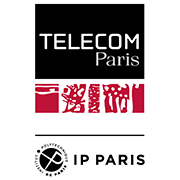</center>

<h1><center><strong>Semantic Textual Similarity (STS) project</strong></center></h1>

<center>
<h3> Team: Ahmed, Anaële, Maxime, Pascal</a></h3>
<h3> Project Supervisor: Aina Garí Soler</a></h3>
<email>aina.garisoler@telecom-paris.fr</email>  <br/>
Year 2023-2024
</center>




#0) INTRODUCTION

## What is Semantic Textual Similarity (STS)?

Semantic Textual Similarity (STS) measures the degree of semantic equivalence between two texts. As an NLP task, it typically consists in determining, for two sentences $s_1$ and $s_2$, how similar they are in meaning. Systems must output a continous score $p$ between, for example, 0 (completely unrelated) and 1 (meaning-equivalent). For example, for these two unrelated sentences, $p$ should be close to 0:

$s_1$: *The black dog is running through the snow.*

$s_2$: *A race car driver is driving his car through the mud.*

### Why is it important?

There are several NLP applications that can directly benefit from STS predictions. Here are some examples:
- Evaluation of **Automatic Summarization** and **Machine Translation** models. These models must output sentences in natural language preserving the meaning of a reference text (the text to be summarized / translated);
- **Information Retrieval**: for checking the semantic equivalence between a query and a potential match;
- **Plagiarism detection**: for locating passages that are similar in content and potentially contain plagiarism.
- **Sentence representation evaluation**: evaluating the quality of sentence embeddings and understanding what information they encode.

### Why is it hard?

**TL;DR**: Because there are different ways of saying the same thing, and there are subtle ways of saying radically different things.

Solving this task involves multiple kinds of non-trivial linguistic knowledge. Relying on counting the common words between $s_1$ and $s_2$ works to some extent, but it is not enough. The example below (taken from [Landauer et al., 1997](http://cetus.stat.cmu.edu/~cshalizi/350/2008/readings/Landauer-Dumais.pdf)), with a very high word overlap, illustrates this. The relations between words in a sentence are also important.

$s_1$: *It was not the sales manager who hit the bottle that day, but the office worker with the serious drinking problem.*

$s_2$: *That day the office manager, who was drinking, hit the problem sales worker with a bottle, but it was not serious.*


<p align="left">
  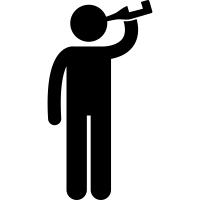


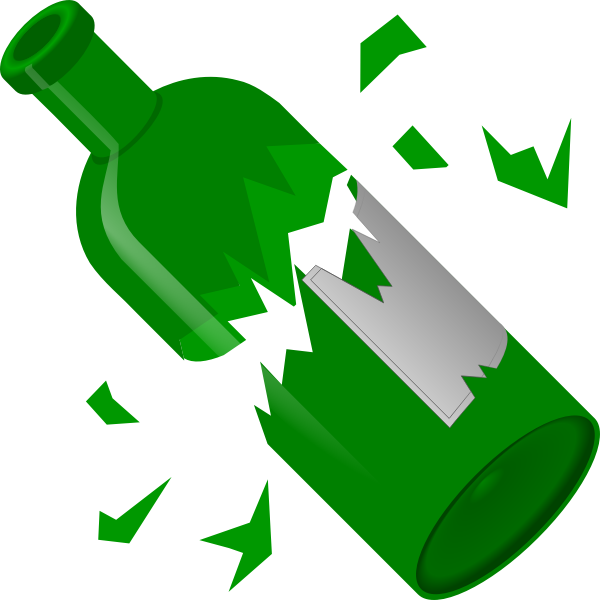



</p>

In fact, people may often refer to the same thing using different words (**synonyms**, like *happy* and *glad*, or **hypernyms**, like *animal* for *dog*).

$s_1$: *I'm happy I managed to fix my dad's bike*

$s_2$: *I'm glad I could repair my father's bicycle*

  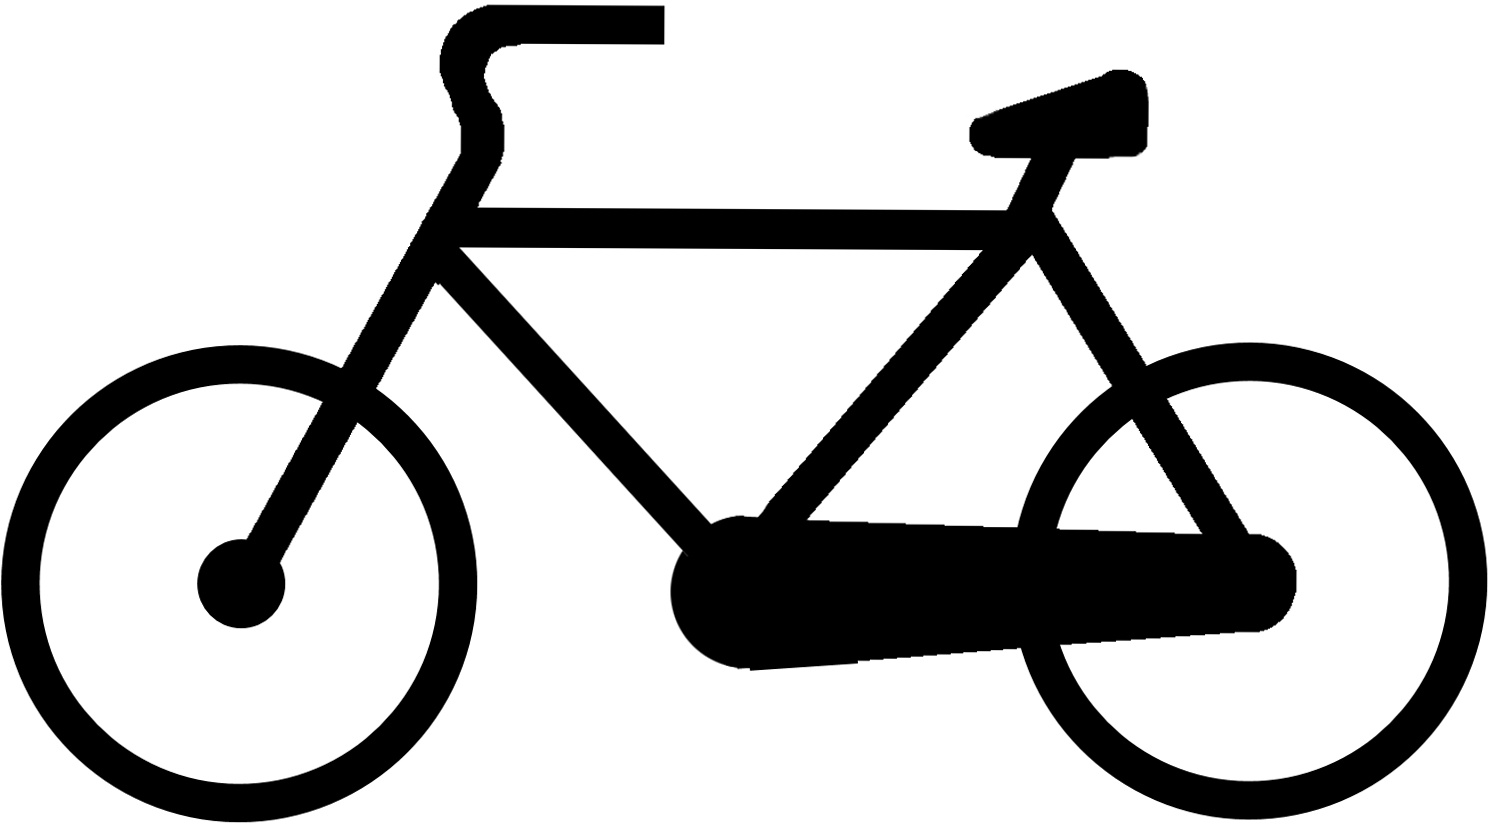

The simple addition of one word can change a situation completely:

$s_1$: *I enjoyed watching the stars* (⭐)

$s_2$: *I enjoyed watching the **TV** stars* (👩‍🎤)

---------------------------------------------------------------------------------------------------------------------


### Biomedical STS

A lot of NLP models are trained on general or mixed-domain corpora, and do not always work very well when applied directly on text with specialized vocabulary. For example, legal or biomedical language is hard to understand for non-experts, even if they are native speakers. These domains could benefit from STS, as it could facilitate the search of similar legal cases or diagnostics.

For this exercise you will:
- Download a specific dataset, as well another set of word embeddings trained on biomedical data.
- **Exercise B.1**: compare word2vec embeddings to the biomedical embeddings and write about it in the report (more details and examples below).
- **Exercise B.2**: implement a model like the one in (2) but relying on biomedical embeddings.
- **Exercise B.3**: Evaluate on this task one of your models relying on w2v embeddings. Compare it to the results obtained in C.2.

Remember to write your observations in the report.


#### (Team B) Dataset

You can download a ready-to-use version of the BIOSSES dataset from [this link](https://drive.google.com/file/d/1xR8m93BucP6Wjt194npmGmCN_CdEL8rD/view?usp=share_link). The original dataset can be found on [this website](https://tabilab.cmpe.boun.edu.tr/BIOSSES/DataSet.html).
Note that it is a very small dataset (only 100 sentence pairs!). For this reason, we will not be doing any training - we will use embedding similarities directly for prediction.

You can read more about this dataset in [this paper](https://watermark.silverchair.com/btx238.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAvEwggLtBgkqhkiG9w0BBwagggLeMIIC2gIBADCCAtMGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQM_c8fJi2ZMK3g-u9WAgEQgIICpNLih7-3oD05jPtpL11-qGClPcamdz7eEVP9sATpAHrUPKMTX2N5hybs8JYjU1M34cYSkp_si8vcJZVXDcgMg5KtvIH5nmpl2RJom4jpffznpxBNHkTnXFcpQbK0b9PK3uO5TtimoJgBbnt07YxC9nusQWhXn8A1x8iaNaa3prRBszQ2G6wBR--vLyVDL62EFDYX_fVwqZ8o2V_asecviJUVBwsZ8AzSHTpQdc0Hy1qbq17YgrATgyf4NfgET5YeWF4vHcYaxTf-a-Z9c9HYYYv2WUOhciwWzyrebHbI2Zu_36MiB_DIA_4cbgPsu-HghYEF9NgZNdoyya8-mbu7BswqzYbPymntFpKHLpcl88EM_zHyQmUr8mfd0VbBsgXIUjlCGJ0nK6sHdundhRlhp0xUpsHxP6oUOYPIDiK3p8i7Zg8yavr76YpxQMCC6HEDwJA8S8sKhs4g76jVW8_X-sO06aju3j-M0eeBRL9g7j0H-cxEed2E8HrzFfJhirmj4_oxpnqmHPaMnQT1zKk_9J4ZVHHL55RbmEDlWAGsMIE6sc6GmBtY5RjbAz-G0JXoPD478kLP3o6EBfXPhsIlnwUQBdhoNSnfiuOLc9DQ3ssu3iZw6er59R7hqZzF-EqGp53b2eA3pvr8oEnoSGaAKF3h6IvyUgjOXeqFpCk0tUzpgxQTCct23bEALplEXGFKR_iplRerD8mNESX_zpsPoYa1AVxyv21Zz5_K5ya_B_k0UpxwWIIL-dj5SbJJUzOjgD10U0i0Q3AW906K8uVVzyjCcdhTWqajz1_70_d03BgxSXhfSxD6n-hpGXEp-cWsPZ836Bc-FmV5cK2zWAkOvc2mxv8RQgiwm5b0JjwI5rC88j-whhSh7NsEQ6L-YGXelQw978c).

Download the dataset, upload it to Colab, get acquainted with it, and load it using the code below.


In [ ]:
#install POT and pyemd necessary to use the Gensim's WMD implementation
#(Python Optimal Transport library)
%pip install POT
#(Python Earth Mover's Distance library)
%pip install pyemd

### Mount colab and Import librairies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
from collections import Counter
from string import punctuation

# NLTK imports
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.download import ('punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger')

# Scikit-learn imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import (jaccard_score, mean_squared_error, r2_score,
                             cosine_similarity, euclidean_distances)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Gensim imports
from gensim.models import KeyedVectors, Word2Vec

# SciPy imports
from scipy.stats import pearsonr
from scipy.spatial.distance import cosine, euclidean


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Get Data

In [ ]:
!unzip "/content/drive/My Drive/BIOSSES_dataset.zip"

Archive:  /content/drive/My Drive/BIOSSES_dataset.zip
replace Annotation-Pairs.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#### Load Dataset

In [ ]:
def load_biosses_dataset():
  data = dict()
  data['data'] = []
  data['scores'] = []
  with open("Annotation-Pairs.csv") as f:
    for i, l in enumerate(f):
      if i == 0:
        continue
      l = l.strip().split("\t")
      data['data'].append((l[1].strip('"'),l[2].strip('"')))
  # Each sentence pair was annotated by five different annotators. As in the original paper, we use the mean as the reference similarity
  with open("Annotator-Scores.csv") as f:
    for i, l in enumerate(f):
      if i == 0:
        continue
      l = l.strip().split("\t")
      scores = list(map(float, l[1:]))
      data['scores'].append(np.average(scores) / 4) # scores range from 0 to 4. We map them to the (0,1) range
  return data


biosses = load_biosses_dataset()

In [ ]:
type(biosses) #dict
biosses.keys() #dict_keys(['data', 'scores'])

dict_keys(['data', 'scores'])

#### (Team B) Biomedical embeddings

You can download the biomedical embeddings [here](https://figshare.com/articles/dataset/) (download the "bio_embeddings_intrinsic file)
You can find more details on how they were trained on [this paper](https://www.nature.com/articles/s41597-019-0055-0)

Below is some code to load them:

In [ ]:
biomedical_model = KeyedVectors.load_word2vec_format("/content/drive/My Drive/bio_embedding_intrinsic", binary=True)

# Number of Words/Tokens , Dimensionality of Embeddings
# ! head -1 "/content/drive/My Drive/bio_embedding_intrinsic" # 2324849 200
# count the number of lines
# ! wc -l "/content/drive/My Drive/bio_embedding_intrinsic" # 6112755

w2v_model = KeyedVectors.load_word2vec_format("/content/drive/My Drive/GoogleNews-vectors-negative300.bin", binary=True)

In [ ]:
l = list(biomedical_model.key_to_index.keys())

file_path = '/content/drive/My Drive/words.txt'  # This will save the file in Colab's local storage

# Writing to the file
with open(file_path, 'w') as file:
    for element in l:
        file.write(element + '\n')

print(f"File saved at {file_path}")

File saved at /content/drive/My Drive/words.txt


In [ ]:
l = list(w2v_model.key_to_index.keys())

file_path = '/content/drive/My Drive/google_words.txt'  # This will save the file in Colab's local storage

# Writing to the file
with open(file_path, 'w') as file:
    for element in l:
        file.write(element + '\n')

print(f"File saved at {file_path}")

File saved at /content/drive/My Drive/google_words.txt


#### (Team B) Comparing embeddings

As part of Exercise C.1, load biomedical and w2v embeddings and make an exploratory analysis looking at questions like the following:
- What are the vocabulary sizes of each model? Look at (and give examples of) words that are present in the biomedical embeddings but not in w2v, and viceversa.
- How much vocabulary of the BIOSSES dataset does each embedding model cover?
- Pick a few word pairs that you expect to be more similar/dissimilar than other word pairs and see what cosine similarities you obtain with each embedding type. Try to include some biomedical words that you know of. What do you observe?
(Example/hint: can you explain what happens with the words *chair*, *table* and *stool*?)

### Exercice B.1

In [ ]:

# vocabulary sizes
biomedical_vocab_size = len(biomedical_model.key_to_index)
w2v_vocab_size = len(w2v_model.key_to_index)
print(f"Biomedical Vocabulary Size: {biomedical_vocab_size}")
print(f"Word2Vec Vocabulary Size: {w2v_vocab_size}")

# Find words in biomedical embeddings / Word2Vec
biomed_unique_words = [word for word in biomedical_model.key_to_index if word not in w2v_model.key_to_index]
# Find words in Word2Vec embeddings / biomedical
w2v_unique_words = [word for word in w2v_model.key_to_index if word not in biomedical_model.key_to_index]

# Print a few examples
print("Biomedical words not in Word2Vec:", biomed_unique_words[:10])
print("Word2Vec words not in biomedical:", w2v_unique_words[:10])

Biomedical Vocabulary Size: 2324849
Word2Vec Vocabulary Size: 3000000
Biomedical words not in Word2Vec: ['of', 'and', 'to', 'a', '-', '10', '95', '12', '20', '15']
Word2Vec words not in biomedical: ['</s>', '##', 'The', 'I', '####', '$', '###', 'It', 'He', 'We']


In [ ]:
pairs = biosses['data']
scores = biosses['scores']

#### Data Pre-processing

In [ ]:
import re
def basic_preprocess(text):
    text = text.lower()
    # Mapping of Greek characters to their literal English names
    greek_to_name = {
        'Α': 'Alpha', 'α': 'alpha',
        'Β': 'Beta', 'β': 'beta',
        'Γ': 'Gamma', 'γ': 'gamma',
        'Δ': 'Delta', 'δ': 'delta',
        'Ε': 'Epsilon', 'ε': 'epsilon',
        'Ζ': 'Zeta', 'ζ': 'zeta',
        'Η': 'Eta', 'η': 'eta',
        'Θ': 'Theta', 'θ': 'theta',
        'Ι': 'Iota', 'ι': 'iota',
        'Κ': 'Kappa', 'κ': 'kappa',
        'Λ': 'Lambda', 'λ': 'lambda',
        'Μ': 'Mu', 'μ': 'mu',
        'Ν': 'Nu', 'ν': 'nu',
        'Ξ': 'Xi', 'ξ': 'xi',
        'Ο': 'Omicron', 'ο': 'omicron',
        'Π': 'Pi', 'π': 'pi',
        'Ρ': 'Rho', 'ρ': 'rho',
        'Σ': 'Sigma', 'σ': 'sigma', 'ς': 'sigma',
        'Τ': 'Tau', 'τ': 'tau',
        'Υ': 'Upsilon', 'υ': 'upsilon',
        'Φ': 'Phi', 'φ': 'phi',
        'Χ': 'Chi', 'χ': 'chi',
        'Ψ': 'Psi', 'ψ': 'psi',
        'Ω': 'Omega', 'ω': 'omega'
    }

    def translate_word(word):
        return ''.join(greek_to_name.get(char, char) for char in word)

    # Split the sentence into words and translate each word if it contains a Greek character
    translated_words = [translate_word(word) if any(char in greek_to_name for char in word) else word for word in text.split()]

    text = ' '.join(translated_words)

    pattern1 = r'\xa0'
    pattern2 = r'\[\s*\d+\s*\]'
    pattern3 = r'\([^)]*[^a-zA-Z\s\)]+[^)]*\)'

    # Remove the references
    cleaned_text = re.sub(pattern1, '', text)
    cleaned_text = re.sub(pattern2, '', cleaned_text)
    cleaned_text = re.sub(r'\(', '', cleaned_text)  # Remove left parenthesis
    cleaned_text = re.sub(r'\)', '', cleaned_text)  # Remove right parenthesis
    return cleaned_text

# # Example usage
# text = 'The protein β-actin is important.'
# translated_text = basic_preprocess(text)
# print(translated_text)  # Output: The protein beta-actin is important.

In [ ]:
def count_unique(pairs):
    unique_words_set = set()
    for pair in pairs :
      words_s1 = pair[0].split()
      words_s2 = pair[1].split()
      unique_words_set.update(words_s1)
      unique_words_set.update(words_s2)
    return unique_words_set

def preporcess_bio(pairs):
  processed_pairs = []
  for pair in pairs:
      sentence_1 = basic_preprocess(pair[0])
      sentence_2 = basic_preprocess(pair[1])
      processed_pairs.append((sentence_1,sentence_2))
  return processed_pairs

pairs_proc = preporcess_bio(pairs)

biomed_words = count_unique(pairs)
biomed_words_grec = count_unique(pairs_proc)

In [ ]:
# biosses
# # Assume the dataset is a list of words.
# biosses_dataset = biosses

# Calculate the coverage of each embedding model on the BIOSSES dataset
biomed_coverage = len(set(biomed_words) & set(biomedical_model.key_to_index)) / len(biomed_words)
biomed_coverage_grec = len(set(biomed_words_grec) & set(biomedical_model.key_to_index)) / len(biomed_words_grec)
w2v_coverage = len(set(biosses) & set(w2v_model.key_to_index)) / len(biosses)

print(f"Biomedical Embeddings Coverage on BIOSSES: {biomed_coverage:.2%}")
print(f"Biomedical Embeddings Coverage on BIOSSES: {biomed_coverage_grec:.2%}")
print(f"Word2Vec Embeddings Coverage on BIOSSES: {w2v_coverage:.2%}")

# Calculate cosine similarities for word pairs
word_pairs = [("chair", "stood"),("epidemic","pandemic"),("sign","symptom"),('benign', 'malignant'), ('vaccine','immunization')]

cosine_similarities_biomed = [biomedical_model.similarity(pair[0], pair[1]) for pair in word_pairs]
cosine_similarities_w2v = [w2v_model.similarity(pair[0], pair[1]) for pair in word_pairs]

# Print the cosine similarities for the selected word pairs
for i, pair in enumerate(word_pairs):
    print('---------------------------------------------------------------------------')
    print(f"Cosine Similarity for {pair} (Biomedical): {cosine_similarities_biomed[i]:.4f}")
    print(f"Cosine Similarity for {pair} (Word2Vec): {cosine_similarities_w2v[i]:.4f}")



Biomedical Embeddings Coverage on BIOSSES: 59.83%
Biomedical Embeddings Coverage on BIOSSES: 77.51%
Word2Vec Embeddings Coverage on BIOSSES: 100.00%
---------------------------------------------------------------------------
Cosine Similarity for ('chair', 'stood') (Biomedical): 0.6665
Cosine Similarity for ('chair', 'stood') (Word2Vec): 0.1018
---------------------------------------------------------------------------
Cosine Similarity for ('epidemic', 'pandemic') (Biomedical): 0.7811
Cosine Similarity for ('epidemic', 'pandemic') (Word2Vec): 0.6384
---------------------------------------------------------------------------
Cosine Similarity for ('sign', 'symptom') (Biomedical): 0.4647
Cosine Similarity for ('sign', 'symptom') (Word2Vec): 0.2661
---------------------------------------------------------------------------
Cosine Similarity for ('benign', 'malignant') (Biomedical): 0.8058
Cosine Similarity for ('benign', 'malignant') (Word2Vec): 0.5249
-----------------------------------

In [ ]:
bio_df = pd.DataFrame(biosses)

In [ ]:
proc_biosses_dataset = {'pairs' : pairs_proc, 'scores': scores}
bio_df_proc = pd.DataFrame(proc_biosses_dataset)

### Exercise B.2:
implement a model like the one in (2) but relying on biomedical embeddings.

In [ ]:
def remove_stop(text):
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))

  filtered_text = [word for word in tokens if word.lower() not in stop_words]

  # Reconstruct the text
  cleaned_text = ' '.join(filtered_text)
  return cleaned_text

def WMD_exp_test(df,list):
  for m in list:
      for i in range(len(df)):
          distance_wmd=df.loc[i, 'distance_WMD']
          label='scores_WMD_exp_'+str(m)
          df.loc[i, label] = np.exp(-distance_wmd*m)
      print('coeff_colelation for m=',m,':',evaluate(df['scores'],df[label]))

def WMD_score_str(df, model, m=1, use_stopwords=False):
    '''Calcule la distance WMD et les scores associé entre deux phrases dans un tupple (dataset non processé)'''
    for i in range(df.shape[0]):
        #retire les mots pas dans le vocabulaire
        s=df.iloc[i,0]
        if use_stopwords:
          s1v=s[0]
          s2v=s[1]
        else :
          s1v=remove_stop(s[0])
          s2v=remove_stop(s[1])
        #calcule distance et scores associés
        distance_wmd=model.wmdistance(s1v,s2v)
        df.loc[i, 'distance_WMD'] = distance_wmd
        df.loc[i, 'scores_WMD_exp'] = np.exp(-distance_wmd*m)
        test_m=[0.1,1,2,3,4,5,10, 15,20,25,30,40,50,60,70,80,90,100,500,1000]
        for m in test_m:
            label='scores_WMD_exp_'+str(m)
            df.loc[i, label] = np.exp(-distance_wmd*m)
            if np.isnan(np.exp(-distance_wmd*m)):
              print('nan value spotted in index',i, ' value ',m)
    for m in test_m:
        label='scores_WMD_exp_'+str(m)
        print('coeff_colelation for m=',m,':',evaluate(df['scores'],df[label]))
        # WMD_exp_test(df,test_m)
        # df.loc[i, 'scores_WMD_inv'] = 1-distance_wmd
    # df['scores_WMD_max'] = 1-df['distance_WMD']/df['distance_WMD'].max()
    return df

### Exercise B.3:
Evaluate on this task one of your models relying on w2v embeddings. Compare it to the results obtained in B.2.

In [ ]:
bio_results = WMD_score_str(bio_df,biomedical_model,use_stopwords=True)

coeff_colelation for m= 0.1 : 0.22136775955709978
coeff_colelation for m= 1 : 0.2261173029808714
coeff_colelation for m= 2 : 0.23088926358916817
coeff_colelation for m= 3 : 0.23514600794270282
coeff_colelation for m= 4 : 0.23890761906380528
coeff_colelation for m= 5 : 0.24219580996438478
coeff_colelation for m= 10 : 0.2523181110731188
coeff_colelation for m= 15 : 0.2538613856700826
coeff_colelation for m= 20 : 0.24925420554494152
coeff_colelation for m= 25 : 0.240647525891759
coeff_colelation for m= 30 : 0.22984481286030142
coeff_colelation for m= 40 : 0.20668556349050038
coeff_colelation for m= 50 : 0.1858617214552493
coeff_colelation for m= 60 : 0.16903643589898554
coeff_colelation for m= 70 : 0.15597139677004193
coeff_colelation for m= 80 : 0.14591679146371078
coeff_colelation for m= 90 : 0.1381407026681947
coeff_colelation for m= 100 : 0.1320683155738822
coeff_colelation for m= 500 : 0.13032924093421738
coeff_colelation for m= 1000 : 0.13692440905872225


In [ ]:
google_results = WMD_score_str(bio_df,w2v_model,use_stopwords=True)

coeff_colelation for m= 0.1 : 0.33058051826586526
coeff_colelation for m= 1 : 0.3329115663136079
coeff_colelation for m= 2 : 0.3346814995102976
coeff_colelation for m= 3 : 0.335657024887543
coeff_colelation for m= 4 : 0.335905188381242
coeff_colelation for m= 5 : 0.3354887725213171
coeff_colelation for m= 10 : 0.3254096595015819
coeff_colelation for m= 15 : 0.3065880725896518
coeff_colelation for m= 20 : 0.2842429865247911
coeff_colelation for m= 25 : 0.2618757794526413
coeff_colelation for m= 30 : 0.24124034246088893
coeff_colelation for m= 40 : 0.20675495063574806
coeff_colelation for m= 50 : 0.17994999762319958
coeff_colelation for m= 60 : 0.1584422604710816
coeff_colelation for m= 70 : 0.1405790114478224
coeff_colelation for m= 80 : 0.12542011669244213
coeff_colelation for m= 90 : 0.11243329444664606
coeff_colelation for m= 100 : 0.1012828876347905
coeff_colelation for m= 500 : 0.03484932471880137
coeff_colelation for m= 1000 : 0.03444011076478142


In [ ]:
bio_results_proc = WMD_score_str(bio_df_proc,biomedical_model,use_stopwords=True)

coeff_colelation for m= 0.1 : 0.2613652749928769
coeff_colelation for m= 1 : 0.26635318984762685
coeff_colelation for m= 2 : 0.27148103031363646
coeff_colelation for m= 3 : 0.276178377261134
coeff_colelation for m= 4 : 0.2804534641395432
coeff_colelation for m= 5 : 0.2843164930782675
coeff_colelation for m= 10 : 0.29789519396874864
coeff_colelation for m= 15 : 0.3032445886933938
coeff_colelation for m= 20 : 0.3022603337920444
coeff_colelation for m= 25 : 0.29674785518601665
coeff_colelation for m= 30 : 0.2882788366240342
coeff_colelation for m= 40 : 0.2671818489316103
coeff_colelation for m= 50 : 0.2453733915745163
coeff_colelation for m= 60 : 0.22559286881016521
coeff_colelation for m= 70 : 0.2086043381839412
coeff_colelation for m= 80 : 0.19432066094764736
coeff_colelation for m= 90 : 0.18236777039242003
coeff_colelation for m= 100 : 0.1723268452672004
coeff_colelation for m= 500 : 0.09024395255331344
coeff_colelation for m= 1000 : 0.08568934398323354


In [ ]:
bio_results = WMD_score_str(bio_df,biomedical_model,use_stopwords=False)
google_results = WMD_score_str(bio_df,w2v_model,use_stopwords=False)
bio_results_proc = WMD_score_str(bio_df_proc,biomedical_model,use_stopwords=False)

coeff_colelation for m= 0.1 : 0.2080386061339744
coeff_colelation for m= 1 : 0.21601983574133776
coeff_colelation for m= 2 : 0.22401308907944087
coeff_colelation for m= 3 : 0.2311085085851523
coeff_colelation for m= 4 : 0.23734362841442644
coeff_colelation for m= 5 : 0.24276497674334888
coeff_colelation for m= 10 : 0.25947749575917833
coeff_colelation for m= 15 : 0.26320253902906476
coeff_colelation for m= 20 : 0.25862346477802184
coeff_colelation for m= 25 : 0.249274332969762
coeff_colelation for m= 30 : 0.23785480802409298
coeff_colelation for m= 40 : 0.2155607781902014
coeff_colelation for m= 50 : 0.1986075679323757
coeff_colelation for m= 60 : 0.18736902148313558
coeff_colelation for m= 70 : 0.18029457941445787
coeff_colelation for m= 80 : 0.17584215646086854
coeff_colelation for m= 90 : 0.17292203357198882
coeff_colelation for m= 100 : 0.1708579149577243
coeff_colelation for m= 500 : 0.14274198370976302
coeff_colelation for m= 1000 : 0.13762415541063627
coeff_colelation for m= 0.1

In [ ]:
# bio_results_stop.describe()
bio_results.columns

Index(['data', 'scores', 'distance_WMD', 'scores_WMD_exp', 'scores_WMD_inv',
       'scores_WMD_max'],
      dtype='object')

In [ ]:
from scipy.stats import pearsonr
def evaluate(predictions, gold_standard):
  return pearsonr(predictions, gold_standard)[0]

In [ ]:
print("Results using the biomed embeddings : ")
print("Pearson's r obtained :", evaluate(bio_results_stop.scores, bio_results_stop.scores_WMD_exp))
print("Pearson's r obtained :", evaluate(bio_results_stop.scores, bio_results_stop.scores_WMD_inv))
print("Pearson's r obtained :", evaluate(bio_results_stop.scores, bio_results_stop.scores_WMD_max))

Results using the biomed embeddings : 
Pearson's r obtained : 0.20710543944986773
Pearson's r obtained : 0.21601983574133776
Pearson's r obtained : 0.20710543944986767


In [ ]:
google_results = WMD_score_str(bio_df,w2v_model,normalize=True)
print("Results using google embeddings : ")
print("Pearson's r obtained :", evaluate(google_results.scores, google_results.scores_WMD_exp))
print("Pearson's r obtained :", evaluate(google_results.scores, google_results.scores_WMD_inv))
print("Pearson's r obtained :", evaluate(google_results.scores, google_results.scores_WMD_max))

Results using google embeddings : 
Pearson's r obtained : 0.3044221005492076
Pearson's r obtained : 0.3122294661646212
Pearson's r obtained : 0.30442210054920765


In [ ]:
bio_vectors = KeyedVectors.load_word2vec_format("/content/drive/My Drive/bio_embedding_intrinsic", binary=True)
# bio_vectors = w2v_model

def get_embedding(word):
    if word in bio_vectors.key_to_index.keys():
        return bio_vectors[word]
    # else:     # if ignoring this step Pearson's r obtained 0.34276939193729505
    #     return np.zeros(bio_vectors.vector_size)  # Pearson's r obtained : 0.3427694889744385
        # return np.random.rand(bio_vectors.vector_size)  # Pearson's r obtained : 0.29944695382154524

def sentence_embedding(sentence):
    words = sentence.split()  # Simple tokenizer, consider using a better one
    embeddings = [get_embedding(word) for word in words if (get_embedding(word) is not None and word not in set(stopwords.words('english')))]
    return np.mean(embeddings, axis=0)  # Averaging word embeddings

# Load your dataset
pairs = proc_biosses_dataset['pairs']
scores = biosses['scores']

def predict_similarity(pair):
    """Predict the similarity score for a pair of sentences."""
    sentence_1, sentence_2 = pair
    embedding_1 = sentence_embedding(sentence_1)
    embedding_2 = sentence_embedding(sentence_2)

    # Using 1 - cosine distance to make it a similarity score
    similarity = 1 - cosine(embedding_1, embedding_2)
    return similarity

predictions = []
for pair in pairs:
    predictions.append(predict_similarity(pair))

print("Pearson's r obtained :", evaluate(scores, predictions))

Pearson's r obtained : 0.6847945154535148


In [ ]:
bio_df_proc.columns

Index(['pairs', 'scores', 'distance_WMD', 'scores_WMD_exp', 'scores_WMD_inv',
       'scores_WMD_max'],
      dtype='object')

In [ ]:
bio_results_proc = WMD_score_str(bio_df_proc,biomedical_model,normalize=True)
print("Results using biomed embeddings after preprocessing: ")
print("Pearson's r obtained :", evaluate(bio_results_proc.scores, bio_results_proc.scores_WMD_exp))
print("Pearson's r obtained :", evaluate(bio_results_proc.scores, bio_results_proc.scores_WMD_inv))
print("Pearson's r obtained :", evaluate(bio_results_proc.scores, bio_results_proc.scores_WMD_max))

Results using biomed embeddings after preprocessing: 
Pearson's r obtained : 0.2809895749492411
Pearson's r obtained : 0.2890181995942924
Pearson's r obtained : 0.2809895749492412
